In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
filename = "dfa_analysis_data.xlsx"
sheetname = "factors"

df = pd.read_excel(filename, sheet_name = sheetname)
df.set_index("Date", inplace = True)
df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0289,-0.0255,-0.0239,0.0022
1926-08-31,0.0264,-0.0114,0.0381,0.0025
1926-09-30,0.0038,-0.0136,0.0005,0.0023
1926-10-31,-0.0327,-0.0014,0.0082,0.0032
1926-11-30,0.0254,-0.0011,-0.0061,0.0031
...,...,...,...,...
2025-04-30,-0.0084,-0.0059,-0.0340,0.0035
2025-05-31,0.0606,0.0070,-0.0288,0.0038
2025-06-30,0.0486,0.0083,-0.0160,0.0034


## 1. The Factors

In [4]:
sample_80 = df[(df.index <= "1980-12-31")]
sample_81_01 = df[(df.index >= "1981-01-01") & (df.index <= "2001-12-31")]
sample_02_end = df[(df.index > "2001-12-31")]

In [6]:
samples = {
    "begin-1980": sample_80,
    "1981–2001": sample_81_01,
    "2002–end": sample_02_end
}
statistics = []

for sample in samples.values():
    stat = pd.DataFrame({
        "mean": sample.mean() * 12,
        "vol": sample.std() * np.sqrt(12),
        "sharpe": (sample.mean() * 12) / (sample.std() * np.sqrt(12)),
        "VaR": sample.quantile(0.05)
    })
    statistics.append(stat)

stats_df = pd.concat(statistics, axis = 1, keys=samples.keys())
stats_df.style.format("{:,.2%}")

## 2. Analyzing Factor Statistics
### 2.1 Does each factor have a premium (positive expected excess return) in each subsample?
No, SMB in the 1981-2001 subsample has a loss of 0.2%
### 2.2 Does the premium to the size factor get smaller after 1980?
Yes, The mean for SMB declined after 1980 and it recovered from -0.2% to 0.79% in 2002, however it never returned to the premium of 3.39% before 1980.

### 2.3 Does the premium to the value factor get smaller during the 1990's?
Based on the graph below, the 1990s shows a volatile period. The value premium declined in early 1990s and have a modest gain throughout 1990s, however the cumulative return drops steeply after 1998, resulting in a smaller premium by the end of the decade.

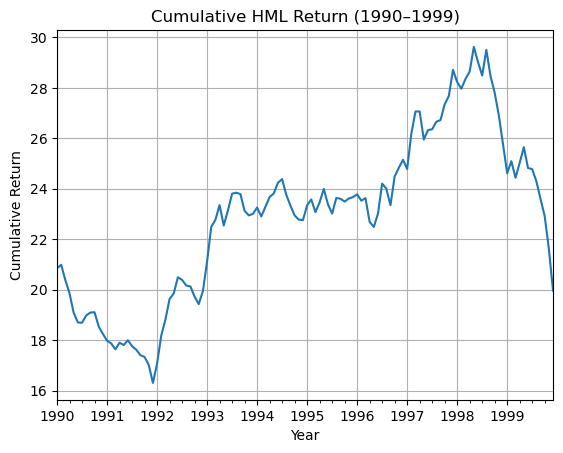

In [13]:
cum_return = (df + 1).cumprod()
cum_ret = cum_return[(cum_return.index >= "1990-01-01") & (cum_return.index <= "1999-12-31")]

ax = cum_ret["HML"].plot()
ax.set_title("Cumulative HML Return (1990–1999)")
ax.set_xlabel("Year")
ax.set_ylabel("Cumulative Return")
ax.grid()


### 2.4 How have the factors performed since the time of the case, (2002 - present)?
- Market Factor: **Strong long-term returns**;Rising since 2002, especially after 2010. Has several drawdowns during 2008 - 2009 (global financial crisis) and 2020 (COVID). Strong recoveries afterward leading to record highs by 2025.

- Size Factor: **Weak or nonexistent**; As shown in the graph where it is mostly flat.

- Value Factor: **Largely disappeared or reversed**; HML line trends slightly downward.

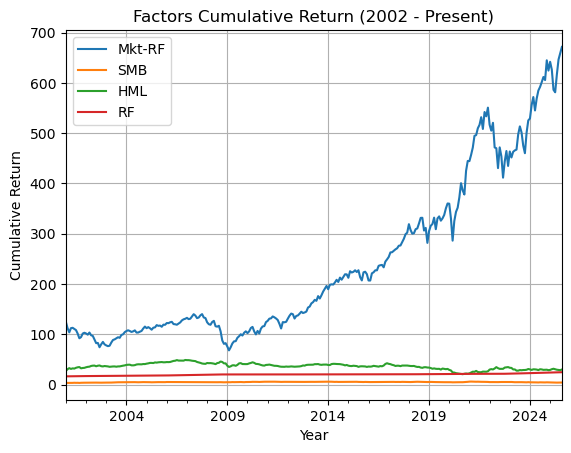

In [14]:
cum_ret_01 = cum_return[(cum_return.index >= "2001-01-01")]
ax = cum_ret_01.plot()
ax.set_title("Factors Cumulative Return (2002 - Present)")
ax.set_xlabel("Year")
ax.set_ylabel("Cumulative Return")
ax.grid()

## 3. Correlation

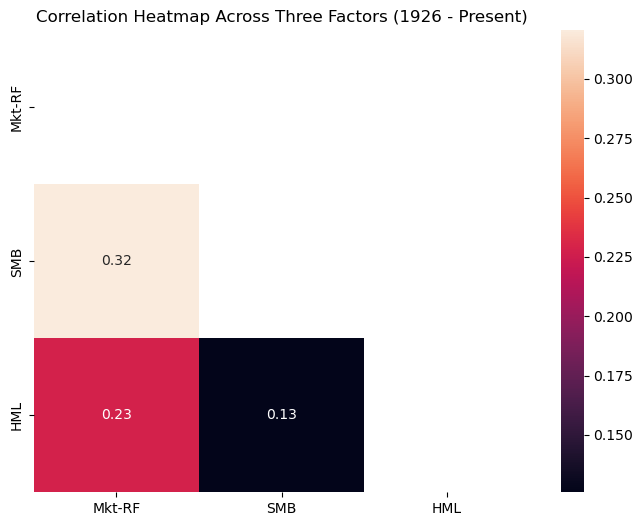

In [23]:
df_corr = df.copy().drop("RF", axis=1)

correlation = df_corr.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

plt.figure(figsize = (8,6))
sns.heatmap(correlation, mask = mask, annot = True, fmt = '.2f')
plt.title('Correlation Heatmap Across Three Factors (1926 - Present)')
plt.show()

The correlation matrix across the three Fama-French factors shows values between 0.13 and 0.32, indicating weak linear relationships. Therefore, the factor construction successfully minimizes correlations, ensuring that each factor captures a distinct risk premium component.

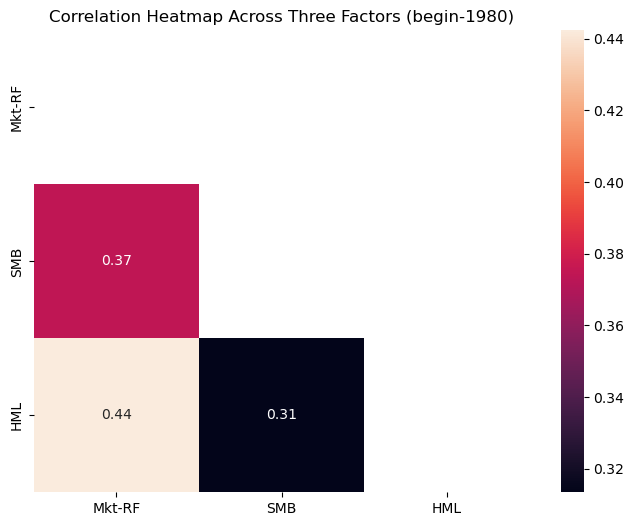

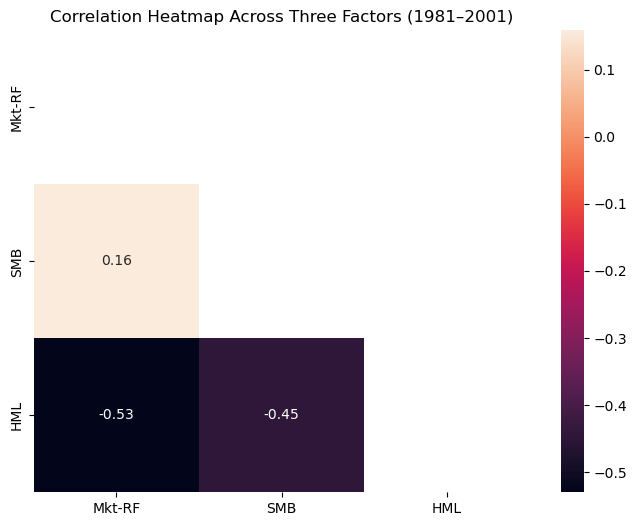

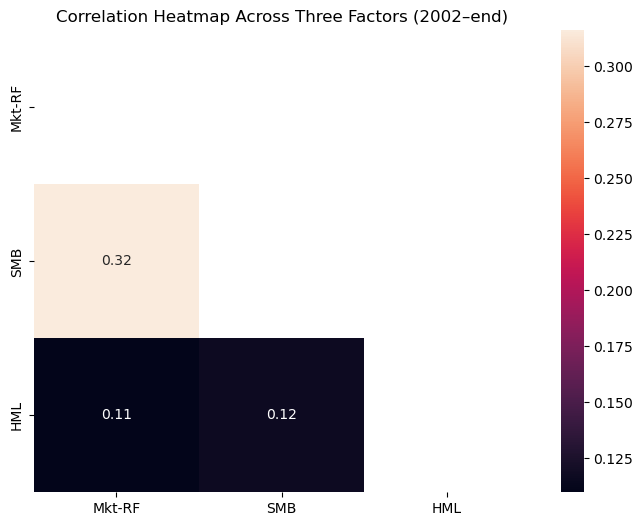

In [25]:
samples = {
    "begin-1980": sample_80,
    "1981–2001": sample_81_01,
    "2002–end": sample_02_end
}

for label, sample in samples.items():
    sample_corr = sample.copy().drop("RF", axis=1)

    correlation = sample_corr.corr()
    mask = np.triu(np.ones_like(correlation, dtype=bool))

    plt.figure(figsize = (8,6))
    sns.heatmap(correlation, mask = mask, annot = True, fmt = '.2f')
    plt.title(f'Correlation Heatmap Across Three Factors ({label})')
    plt.show()

- begin - 1980 : 0.31 - 0.44, the factors are more correlated with each other, particularly with market
- 1981 - 2001 : -0.53 - 0.16, the factors shows strong negative correlation especially with value factor (HML). The negative correlations provide diversification
- 2002 - end : 0.11 - 0.32, the most similar to (1926-present) correlations. The factors has low correlation with each other

## 4. Plot Cumulative Returns

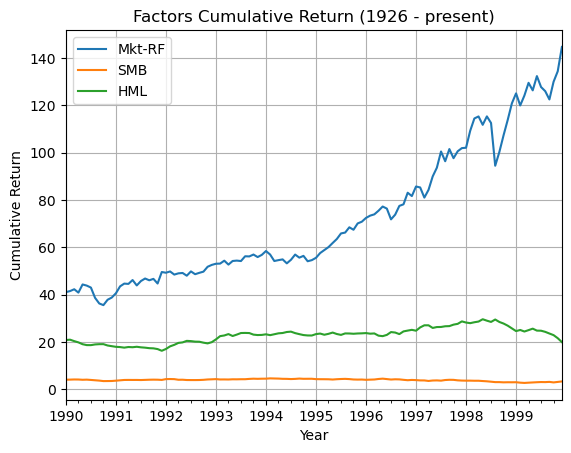

In [68]:
ax = cum_ret.drop("RF", axis = 1).plot()
ax.set_title("Factors Cumulative Return (1926 - present)")
ax.set_xlabel("Year")
ax.set_ylabel("Cumulative Return")
ax.grid()

### Cumulative Return (1981 - 2001) and (2002 - present)

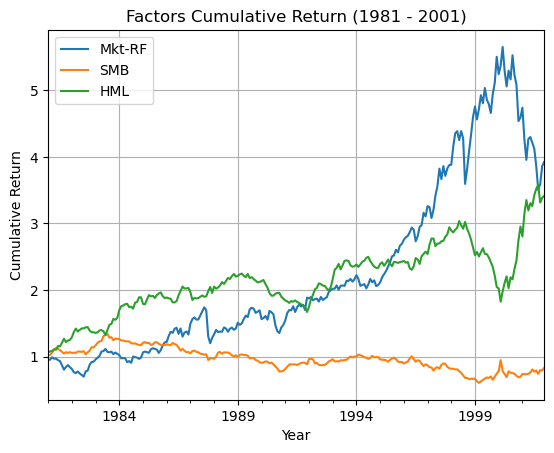

In [32]:
cum_ret_81_01 = (sample_81_01 + 1).cumprod().drop("RF", axis = 1)
ax = cum_ret_81_01.plot()
ax.set_title("Factors Cumulative Return (1981 - 2001)")
ax.set_xlabel("Year")
ax.set_ylabel("Cumulative Return")
ax.grid()

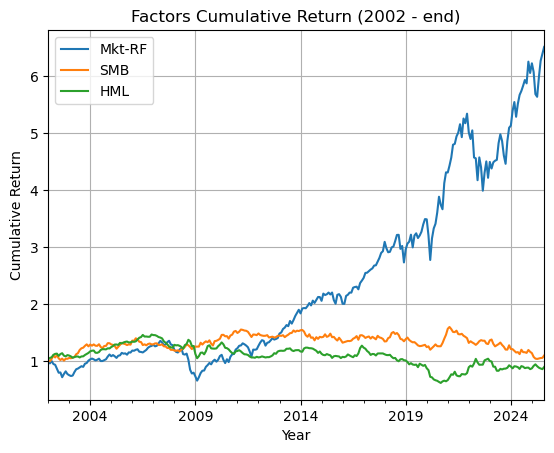

In [31]:
cum_ret_02_end = (sample_02_end + 1).cumprod().drop("RF", axis = 1)
ax = cum_ret_02_end.plot()
ax.set_title("Factors Cumulative Return (2002 - end)")
ax.set_xlabel("Year")
ax.set_ylabel("Cumulative Return")
ax.grid()

## 5. 
### 5.1 Does it appear that all three factors were valuable in 1981 - 2001?
Only **market** and **value** factor showed positive return, with market value delivered a very strong performance

### 5.2 And Post 2001?
Only **market** factor showed a strong positive premium. Both size (SMB) and value (HML) factors failed to deliver consistent excess returns, with HML turning negative for extended periods.

This indicates a regime where traditional Fama–French factors lost predictive power, and the equity risk premium dominated portfolio performance. so **DFA shouldn't continue emphasizing the three factors**

# 3. CAPM

In [8]:
sheetname = "portfolios (total returns)"

portfolio_df = pd.read_excel(filename, sheet_name = sheetname)
portfolio_df.set_index("Date", inplace = True)
portfolio_df

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.058276,-0.017006,0.005118,-0.021477,0.019583,0.012118,0.024107,0.006056,-0.026082,-0.004527,...,0.015376,0.015460,0.013389,0.002765,0.024678,0.033248,0.060909,0.020285,0.031263,0.005623
1926-08-31,-0.020206,-0.080282,0.013968,0.021483,0.085104,0.023620,-0.007525,0.038984,0.002299,0.062937,...,0.013858,0.038587,0.019738,0.021336,0.053422,0.010169,0.041975,0.019769,0.054924,0.077576
1926-09-30,-0.048291,-0.026806,-0.043417,-0.032683,0.008586,-0.026849,-0.005252,0.010789,-0.032877,-0.009419,...,0.016897,-0.005246,-0.017724,0.014806,0.008730,-0.012951,0.036610,0.001384,-0.007497,-0.024284
1926-10-31,-0.093633,-0.035519,-0.035024,0.034413,-0.025452,-0.028014,-0.044191,-0.050767,-0.080271,-0.013213,...,-0.039136,-0.026528,-0.021058,-0.032532,-0.053525,-0.027382,-0.030061,-0.022467,-0.046725,-0.058129
1926-11-30,0.055888,0.041877,0.024384,-0.044495,0.005110,0.031023,-0.017317,0.030425,0.049538,0.027292,...,0.034492,0.023823,0.037315,0.051102,0.018213,0.044331,0.025355,0.015280,0.036596,0.025636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30,0.008068,0.016903,0.008944,-0.006342,-0.025251,0.005969,-0.009047,-0.024543,-0.031368,-0.063772,...,-0.008766,-0.012699,-0.020146,-0.039276,-0.072668,0.014106,-0.030129,-0.073867,-0.013472,-0.027941
2025-05-31,0.108449,0.057624,0.053431,0.042479,0.057172,0.044605,0.050800,0.069533,0.050692,0.058568,...,0.062577,0.050222,0.035353,0.081175,0.065826,0.078077,0.061296,0.018407,0.026156,0.065684
2025-06-30,0.138579,0.058805,0.086403,0.046825,0.055347,0.062285,0.066343,0.073562,0.056160,0.050304,...,0.020351,0.043192,0.024175,0.073815,0.058024,0.055279,0.062451,0.047405,0.036424,0.070109


## 3.1 Summary Statistics

In [9]:
portfolio_df = portfolio_df.apply(lambda x: x - df["RF"], axis = 0)

In [10]:
stats = pd.DataFrame()
for portfolio in portfolio_df.columns:
    stat = pd.Series(
        {
            "mean": portfolio_df[portfolio].mean() * 12,
            "vol": portfolio_df[portfolio].std() * np.sqrt(12),
            "sharpe": (portfolio_df[portfolio].mean() * 12) / (portfolio_df[portfolio].std() * np.sqrt(12)),
            "VaR": portfolio_df[portfolio].quantile(0.05)
        }
    )
    stats[portfolio] = stat

stats = stats.T
stats.style.format("{:,.2%}")

,mean,vol,sharpe,VaR
SMALL LoBM,6.83%,41.27%,16.55%,-14.29%
ME1 BM2,7.91%,33.43%,23.67%,-12.84%
ME1 BM3,11.72%,30.64%,38.25%,-10.41%
ME1 BM4,13.51%,28.66%,47.12%,-10.21%
SMALL HiBM,16.08%,31.74%,50.65%,-11.36%
ME2 BM1,7.74%,27.60%,28.05%,-11.11%
ME2 BM2,11.10%,25.90%,42.86%,-9.64%
ME2 BM3,11.52%,25.00%,46.09%,-9.30%
ME2 BM4,12.42%,25.74%,48.26%,-9.38%
ME2 BM5,14.76%,30.03%,49.16%,-11.25%


## 3.2 CAPM 

In [11]:
#OLS
params = pd.DataFrame()

for portfolio in portfolio_df.columns:
    y = portfolio_df[portfolio]
    X = sm.add_constant(df["Mkt-RF"])
    model = sm.OLS(y,X)
    results = model.fit()

    alpha = results.params.iloc[0]
    beta = results.params.iloc[1]

    param = pd.Series(
        {
            "alpha": alpha,
            "beta": beta,
            "treynor ratio": stats.at[portfolio, "mean"] / beta,
            "information ratio": alpha / stats.at[portfolio, "vol"]
        }
    )
    params[portfolio] = param

params = params.T
params


,alpha,beta,treynor ratio,information ratio
SMALL LoBM,-0.005362,1.602311,0.042616,-0.012992
ME1 BM2,-0.003013,1.392971,0.056813,-0.009014
ME1 BM3,0.000392,1.359342,0.086228,0.001278
ME1 BM4,0.002532,1.264748,0.106790,0.008832
SMALL HiBM,0.004012,1.360529,0.118158,0.012643
ME2 BM1,-0.002310,1.270198,0.060946,-0.008370
ME2 BM2,0.000754,1.231694,0.090114,0.002911
ME2 BM3,0.001321,1.200621,0.095969,0.005282
ME2 BM4,0.001967,1.215841,0.102180,0.007641
ME2 BM5,0.002805,1.376946,0.107213,0.009340


In [74]:
mae = params["alpha"].abs().mean()
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print("If the CAPM were true, we'd expect the MAE to be close to 0")

Mean Absolute Error (MAE): 0.001514
If the CAPM were true, we'd expect the MAE to be close to 0


If CAPM is true:
- alpha will be close to zero, as the CAPM fully explains returns via beta
- Treynor Ratio will be the same across all portfolios, as the risk-adjusted return per unit beta should equal market premium
- Information Ratio will be close to zero as there is no alpha


The estimated alphas are mostly small, suggesting that the CAPM explains a large portion of the cross-section of average returns. However, the non-zero alphas for certain portfolios (e.g., small or high book-to-market portfolios) indicate systematic deviations from the model.

The Treynor ratios are roughly similar across portfolios, as expected if the CAPM holds, but not identical.

The Information Ratios are close to zero, implying that abnormal performance after adjusting for market exposure is limited.

Overall, while CAPM captures much of the variation in returns, the residual patterns suggest additional factors may be relevant.

## 3.3 Cross-sectional Estimation

In [75]:
y = stats["mean"]
X = sm.add_constant(params["beta"])

model = sm.OLS(y,X)
results = model.fit()

print(f"R-squared: {results.rsquared:.4f}")
print(f"Intercept: {results.params.iloc[0]:.4f}")
print(f"Regression Coefficient: {results.params.iloc[1]:.4f}")

R-squared: 0.0975
Intercept: 0.0480
Regression Coefficient: 0.0478


if the CAPM were completely accurate:
- $R^2$ should be close to 1, as beta should fully explain mean returns
- the intercept $\eta$ should be 0 because portfolios with no market risk should earn 0 excess return
- the regression coefficient $\lambda_{mkt}$ should equal to the average market excess return.


## 3.4 Conclusion

While the cumulative returns to SMB and HML have been modest since 2002, the low correlations among Mkt–RF, SMB, and HML suggest that these factors continue to represent distinct and largely independent sources of risk.

Therefore, even though the realized size and value premia have been weak, DFA’s continued emphasis on these factors is not purely about return magnitude, it is about capturing multiple uncorrelated risk dimensions that together provide more stable, diversified exposure than the market alone.

In other words, CAPM fails to explain the cross-section of returns as shown by the very small $R^2$, and while SMB and HML have not delivered strong realized returns recently, they remain economically meaningful because they reflect orthogonal risks that the single-factor CAPM ignores.